In [1]:
import os, sys
from scipy import stats
import numpy as np
import pandas as pd

from scipy import stats

sys.path.insert(1, '../libs/')
from stat_lib import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Comparando-se o mesmo grupo muitas vezes

  - ANOVA
  - Tukey
  - Dunnett

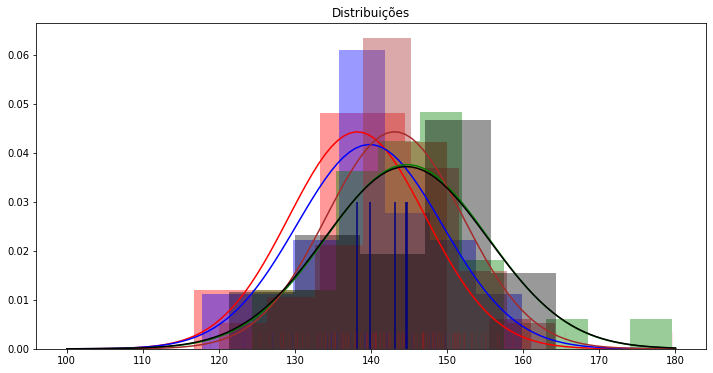

In [2]:
samps=[]; mus = []; sdvs = []
N   = 30
samples = 5
hline = 0.03; colors = ['red', 'blue', 'green', 'brown', 'black']

mu = 140; delmu = 1
sdv = 10; delsdv = .1

for i in range(samples):
    samps.append(np.random.normal(loc=mu, scale=sdv, size=N))
    mu += delmu
    sdv += delsdv

    mus.append(np.mean(samps[i]))
    sdvs.append(np.std(samps[i]))

fig = plt.figure(figsize=(12, 6))
seqx = np.linspace(100, 180, 100)

for i in range(samples):
    if i == 0:
        ax  = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'blue', "alpha": .1,})
    else:
        ret = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

    plt.vlines(mus[i], 0, hline, color = 'navy')
    
    sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i])

title = 'Distribuições'
plt.title(title);

### As distribuições são nomais? teste de Shaprio-Wilkis

In [3]:
for i in range(samples):
    ret1, text1, text_stat1, stat1, pvalue1 = test_normality_desc(samps[i])
    print(text1, text_stat1)

A distribuição se assemelha a uma distriuição normal (não se rejeita a H0) p-value 3.54e-01 (NS)
A distribuição se assemelha a uma distriuição normal (não se rejeita a H0) p-value 3.55e-01 (NS)
A distribuição não se assemelha a uma distriuição normal (rejeita-se a H0) p-value 4.16e-02 (*)
A distribuição se assemelha a uma distriuição normal (não se rejeita a H0) p-value 9.57e-01 (NS)
A distribuição se assemelha a uma distriuição normal (não se rejeita a H0) p-value 5.40e-01 (NS)


### As variâncias iguais?

In [4]:
def test_one_way_ANOVA5 (samp1, samp2, samp3, samp4, samp5, alpha = 0.05):
    # teste de variancias de Fisher - one way ANOVA (analysis of variance)
    stat, pvalue = stats.f_oneway(samp1, samp2, samp3, samp4, samp5)

    if pvalue > alpha:
        text = 'As distribuições tem variâncias similares (não se rejeita a H0)'
        ret = True
    else:
        text = 'As distribuições não têm variâncias similares (rejeita-se a H0)'
        ret = False

    text_stat = 'p-value %.2e (%s)'%(pvalue, stat_asteristics(pvalue))

    return ret, text, text_stat, stat, pvalue

In [5]:
ret, text, text_stat, stat, pvalue = test_one_way_ANOVA5(samps[0],samps[1],samps[2],samps[3],samps[4])
text, text_stat

('As distribuições não têm variâncias similares (rejeita-se a H0)',
 'p-value 3.73e-02 (*)')

### Alterando a variância das distribuições

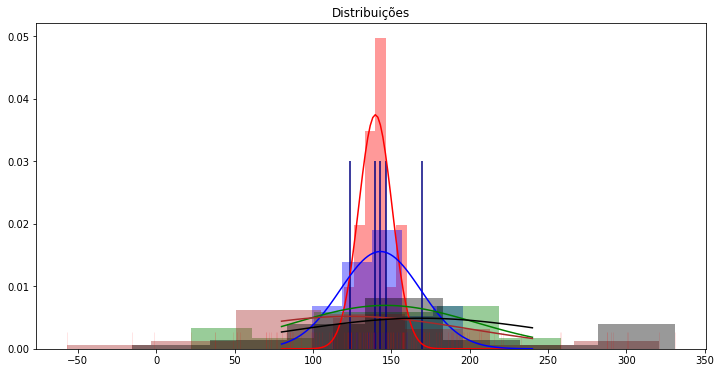

In [6]:
samps=[]; mus = []; sdvs = []
N   = 30
samples = 5
hline = 0.03; colors = ['red', 'blue', 'green', 'brown', 'black']

mu = 140; delmu = .5
sdv = 10; delsdv = 20

for i in range(samples):
    samps.append(np.random.normal(loc=mu, scale=sdv, size=N))
    mu += delmu
    sdv += delsdv

    mus.append(np.mean(samps[i]))
    sdvs.append(np.std(samps[i]))

fig = plt.figure(figsize=(12, 6))
seqx = np.linspace(80, 240, 100)

for i in range(samples):
    if i == 0:
        ax  = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'blue', "alpha": .1,})
    else:
        ret = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

    plt.vlines(mus[i], 0, hline, color = 'navy')
    
    sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i])

title = 'Distribuições'
plt.title(title);

In [7]:
ret, text, text_stat, stat, pvalue = test_one_way_ANOVA5(samps[0],samps[1],samps[2],samps[3],samps[4])
text, text_stat

('As distribuições tem variâncias similares (não se rejeita a H0)',
 'p-value 5.84e-02 (NS)')

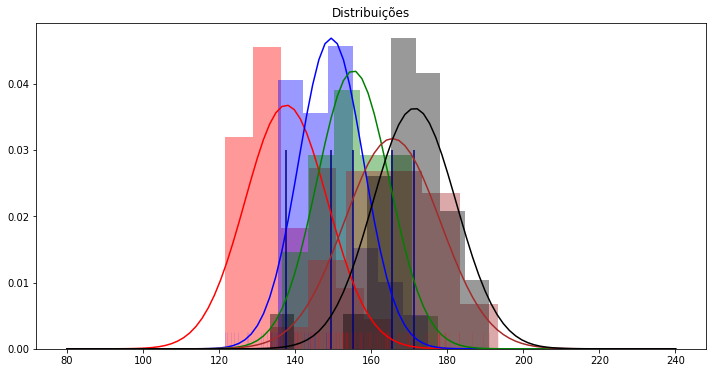

In [8]:
samps=[]; mus = []; sdvs = []
N   = 30
samples = 5
hline = 0.03; colors = ['red', 'blue', 'green', 'brown', 'black']

mu = 140; delmu = 8
sdv = 10; delsdv = .6

for i in range(samples):
    samps.append(np.random.normal(loc=mu, scale=sdv, size=N))
    mu += delmu
    sdv += delsdv

    mus.append(np.mean(samps[i]))
    sdvs.append(np.std(samps[i]))

fig = plt.figure(figsize=(12, 6))
seqx = np.linspace(80, 240, 100)

for i in range(samples):
    if i == 0:
        ax  = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'blue', "alpha": .1,})
    else:
        ret = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, color=colors[i], rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

    plt.vlines(mus[i], 0, hline, color = 'navy')
    
    sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i])

title = 'Distribuições'
plt.title(title);

In [9]:
ret, text, text_stat, stat, pvalue = test_one_way_ANOVA5(samps[0],samps[1],samps[2],samps[3],samps[4])
text, text_stat

('As distribuições não têm variâncias similares (rejeita-se a H0)',
 'p-value 8.24e-25 (***)')

### Tuckey test - Post-hoc test 

É chamado de test de Tukey, ou método de Tukey, ou teste de significância honesta de Tukey
 
**POST-HOC** - depois disto

**ANOVA** diz se as distribuições são diferentes mas não diz qual e quanto.

https://en.wikipedia.org/wiki/Tukey%27s_range_test

In [10]:
from statsmodels.stats.multicomp import MultiComparison

In [11]:
df = pd.DataFrame([samps[0], [0]*N]).T
df.columns = ['val', 'group']

for i in range(1,5):
    dfa = pd.DataFrame([samps[i], [i]*N]).T
    dfa.columns = ['val', 'group']
    
    df = df.append(dfa)

df.shape, df.group.unique()

((150, 2), array([0., 1., 2., 3., 4.]))

<Figure size 3600x2400 with 0 Axes>

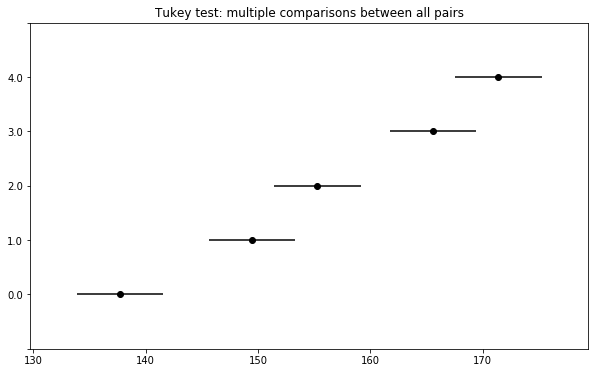

In [12]:
plt.figure(figsize=(12,8), dpi=300)

cardata = MultiComparison(df.val, df.group)
results = cardata.tukeyhsd()

title  = "Tukey test: multiple comparisons between all pairs"

results.plot_simultaneous()
plt.title(title);

### Combinações

In [13]:
for i in range(samples-1):
    for j in range(i+1, samples):
        print(i, j)

0 1
0 2
0 3
0 4
1 2
1 3
1 4
2 3
2 4
3 4


In [14]:
results.meandiffs

array([11.79676704, 17.59358417, 27.88011215, 33.69958327,  5.79681713,
       16.08334511, 21.90281623, 10.28652798, 16.1059991 ,  5.81947112])

In [15]:
results.confint

array([[ 4.12030139, 19.47323269],
       [ 9.91711852, 25.27004981],
       [20.2036465 , 35.55657779],
       [26.02311762, 41.37604891],
       [-1.87964852, 13.47328277],
       [ 8.40687946, 23.75981075],
       [14.22635058, 29.57928187],
       [ 2.61006233, 17.96299363],
       [ 8.42953346, 23.78246475],
       [-1.85699452, 13.49593677]])

In [16]:
results.pvalues

array([0.001     , 0.001     , 0.001     , 0.001     , 0.23178537,
       0.001     , 0.001     , 0.00277128, 0.001     , 0.22825355])

In [17]:
print(results.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  11.7968  0.001  4.1203 19.4732   True
   0.0    2.0  17.5936  0.001  9.9171   25.27   True
   0.0    3.0  27.8801  0.001 20.2036 35.5566   True
   0.0    4.0  33.6996  0.001 26.0231  41.376   True
   1.0    2.0   5.7968 0.2318 -1.8796 13.4733  False
   1.0    3.0  16.0833  0.001  8.4069 23.7598   True
   1.0    4.0  21.9028  0.001 14.2264 29.5793   True
   2.0    3.0  10.2865 0.0028  2.6101  17.963   True
   2.0    4.0   16.106  0.001  8.4295 23.7825   True
   3.0    4.0   5.8195 0.2283  -1.857 13.4959  False
----------------------------------------------------


### Dunnett test

  - Um único controle
  - Múltiplos cases
  
Este é o caso quando queremos fazer um experimento de processo anti-inflamatório:
  - Temos uma cultura de células em PBS
  - Adicionamos um sinal inflmatório e medimos TNF após 30 min
  - Após uma hora adicionamos dexametasona e medimos TNF-A após 2 horas
  - Repetimos o experimento acima adicionando uma dada droga e medindo o TNF-A após 2 horas
  
    - Controle: PBS
    - Case: controle positivo - inflamação
    - Case: controle negativo - dexametazona
    - Cases: mais 3 cases com 3 outras drogas
  

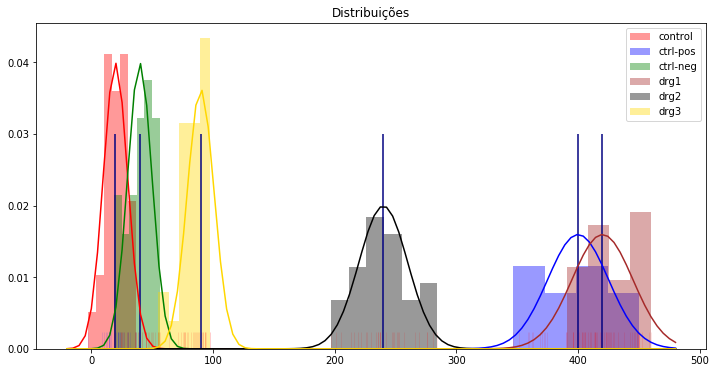

In [19]:
samps=[]; mus = []; sdvs = []
N   = 30
hline = 0.03; colors = ['red', 'blue', 'green', 'brown', 'black', 'gold']
sampNames = ['control', 'ctrl-pos', 'ctrl-neg', 'drg1', 'drg2', 'drg3']

mus  = [20, 400, 40, 420, 240,90]
sdvs = [10, 25,  10,  25,  20, 11]
samples = len(mus)

for i in range(samples):
    samps.append(np.random.normal(loc=mus[i], scale=sdvs[i], size=N))


fig = plt.figure(figsize=(12, 6))
seqx = np.linspace(-20, 480, 100)

for i in range(samples):
    if i == 0:
        ax  = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, label=sampNames[i], color=colors[i], rug_kws={"color": 'blue', "alpha": .1,})
    else:
        ret = sns.distplot(samps[i], kde=False, rug=True, norm_hist=True, label=sampNames[i], color=colors[i], rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

    plt.vlines(mus[i], 0, hline, color = 'navy')
    
    sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i])

title = 'Distribuições'
plt.title(title)
plt.legend;

### Barplot

In [20]:
df2 = pd.DataFrame([samps[0], [sampNames[0]]*N]).T
df2.columns = ['val', 'group']

for i in range(1,samples):
    dfa = pd.DataFrame([samps[i], [sampNames[i]]*N]).T
    dfa.columns = ['val', 'group']
    
    df2 = df2.append(dfa)

df2.shape, df2.group.unique()

((180, 2),
 array(['control', 'ctrl-pos', 'ctrl-neg', 'drg1', 'drg2', 'drg3'],
       dtype=object))

Text(0.5, 0, '')

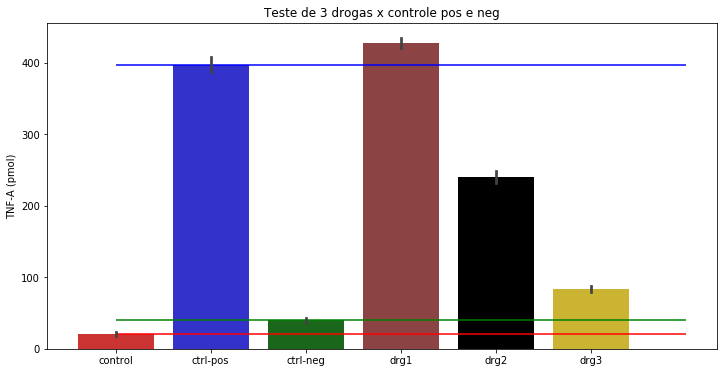

In [21]:
plt.figure(figsize=(12,6))
ci = 95

ax = sns.barplot(x="group", y="val", data=df2, saturation=0.6, palette=colors, ci=ci)

for i in range(3):
    mu = np.mean(samps[i])
    plt.hlines(mu, 0, 6, color = colors[i])

plt.title("Teste de 3 drogas x controle pos e neg")
plt.ylabel('TNF-A (pmol)')
plt.xlabel('')

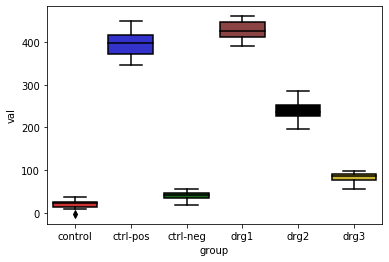

In [22]:
sns.boxplot(x="group", y="val", data=df2, saturation=0.6, palette=colors);

In [ ]:
ci = 95

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10), sharey=True)

ret = sns.barplot(x="group", y="val", data=df2, saturation=0.6, palette=colors, ci=ci, ax=ax[0])

for i in range(3):
    mu = np.mean(samps[i])
    ax[0].hlines(mu, 0, 6, color = colors[i])
    
ax[0].set_ylabel('TNF-A (pmol)')
ax[0].set_xlabel('')
ax[0].set_title("Distribuições com n = %d"%(N))

wantLines = False
if wantLines:
    y1 = 150; del_y1 = 5; xmin=0; xmax=1
    ax[0].hlines(y=y1, xmin=xmin, xmax=xmax, colors='black')
    ax[0].text(x=.3, y=y1+del_y1, s=text_statH)

    y2 = 170; del_y2 = 5; xmin=1; xmax=2
    ax[0].hlines(y=y2, xmin=0, xmax=xmax, colors='black')
    ax[0].text(x=1+.3, y=y2+del_y2, s=text_statM)


seqx = np.linspace(-20, 480, 100)

for i in range(samples):
    retQ = sns.distplot(samps[i], kde=True, rug=True, norm_hist=True, label=sampNames[i], color=colors[i], vertical=True, rug_kws={"color": 'blue', "alpha": .1,}, ax=ax[1])
    # ax[1].vlines(mus[i], 0, hline, color = 'navy')
    
    # sns.lineplot(seqx, stats.norm.pdf(seqx, mus[i], sdvs[i]), color=colors[i], ax=ax[1])

ax[1].legend()

if wantLines:
    ax[1].hlines(y=muC, xmin=0, xmax=0.035, colors='black')
    ax[1].hlines(y=muH, xmin=0, xmax=0.03,  colors='black')
    ax[1].hlines(y=muM, xmin=0, xmax=0.03,  colors='black')

    ax[1].vlines(x=0.032, ymin=muC+erro0, ymax=muC-erro0, colors='black')
    ax[1].vlines(x=0.028, ymin=muH+erro1, ymax=muH-erro1, colors='black')
    ax[1].vlines(x=0.026, ymin=muM+erro2, ymax=muM-erro2, colors='black')

    ax[1].set_ylabel('')
    ax[1].set_xlabel('percentagem (%)')
    ax[1].set_title("distribuições");


sns.boxplot(x="group", y="val", data=df2, saturation=0.6, palette=colors, ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_xlabel('')
ax[2].set_title("box-plot");